<br>
<hr>
<span style="color:#40D24F"><span style="background-color:lightyellow">**Analysis of supermarket transaction data**</span></span>

The data file **supermarket.csv** contains a supermarket transactionsdata. Most variables are self-explanatory:

- Department - department in supermarket.

- Product - product name (encoded).

- Checkout - checkout number.

- Date - date of the transaction.

- Time - time of the transaction.

- Basket - basket (in fact, receipt) number, most probably it's unique however you can not be 100% confident in it.

- Total - price paid for the product.

You have to execute an analysis of the data and provide answers for the following research questions which are of great interest for many people in the retail industry:

1. Study the distribution of basket sizes measured by the number of items in a basket. What basket size is the most popular? 

2. Study the relation between number of items in the basket and dollar value of the basket. Considering different "popularity" of different basket sizes from question 1, how much money does store get from each size of the basket? What kind of customers are more important - light (small baskets) of heavy (large baskets)? 

3. What day of the week is the busiest for the supermarket in terms of a number of shopping trips (one basket = one shopping trip)? What day is the most profitable? 

For each question you have to provide appropriate graph (or multiple graphs) and brief discussion to present your finding, answer the research question and explain your graph. 


<span style="color:blue">**The output of your program should be, at the minimum, the following information:**</span>

1. Brief introduction with a presentation of your data.

2. Answers on the research questions with relevant numerical and graphical outputs.

3. Short description summarising your findings. This description is to be written by yourself (not your program, unless you want to be REALLY fancy!) and at most two paragraphs will be sufficient.  For the purpose of this assignment, one paragraph is 6-8 lines long.<br><br>
    

In [1]:
# Here you start your code
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(sys.version)

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#load data
data_file = os.path.join(os.getcwd(),'supermarket.csv')
sales = pd.read_csv(data_file)

print("Data types in the file:")
print(sales.dtypes)

0.18.1
3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Data types in the file:
Department     object
Product        object
Checkout        int64
Date           object
Time           object
Basket          int64
Total         float64
dtype: object


Pd version: 0.18.1  
Python version: 3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]  
The dataset contains 729414 records about supermasket transaction. Each record contains information about deparment, product, checkout, date, time, basket, total of each transaction. One or more transactions belong to a basket. Basket number is not unique. Different baskets may have the same basket number. Using date and time with basket number will distinguish which transactions belong to basket.If transactions belong to the same basket, they should have the same date, time and basket number. 

            Amount
BasketSize        
1            18861
2             9490
3             7300
4             5972
5             4920
6             4221
7             3620
8             3192
9             2773
10            2365


C:\Users\Tu Tran\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


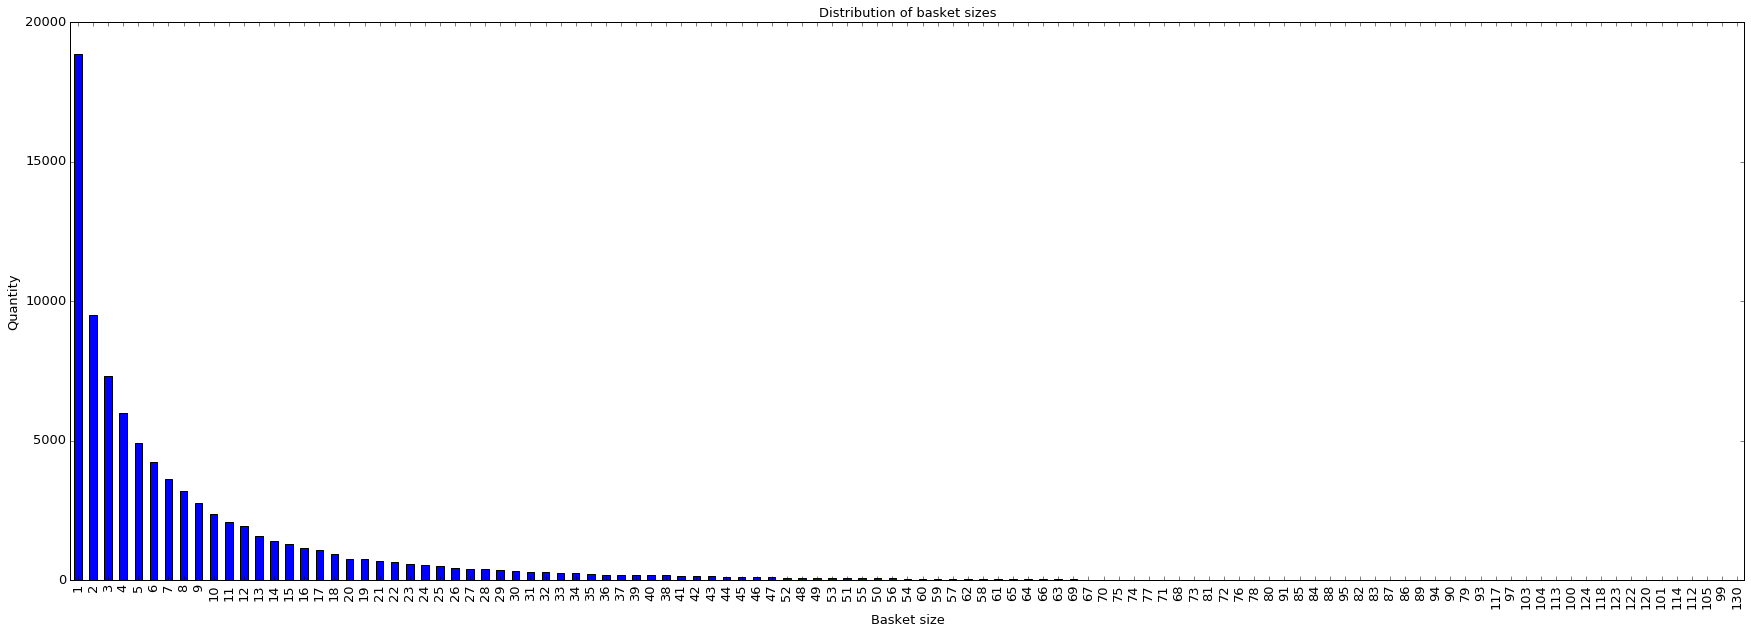

In [2]:
#a
products_basket = sales[['Basket', 'Date', 'Time']]
#group by basket, date and time and count the items in each basket
basket_group = products_basket.groupby(['Basket', 'Date', 'Time']).agg({'Basket':'count'})
basket_group.rename(columns={'Basket':'BasketSize'}, inplace=True)
#group by basket size and count the basket sizes
basket_size_group = basket_group.groupby(['BasketSize']).agg({'BasketSize':'count'})
basket_size_group.rename(columns={'BasketSize':'Amount'}, inplace=True)
basket_size_group = basket_size_group.sort_values(by='Amount', ascending=0)
#get 10 popular basket size
print(basket_size_group.head(10))
#load bar chart of distribution of basket sizes
basket_size_bar_plot = basket_size_group.sort(columns='Amount',ascending=False).plot(kind='bar', legend=None, figsize = (30,10), title="Distribution of basket sizes")
basket_size_bar_plot.set_xlabel("Basket size")
basket_size_bar_plot.set_ylabel("Quantity")
for item in ([basket_size_bar_plot.title, basket_size_bar_plot.xaxis.label, basket_size_bar_plot.yaxis.label] + basket_size_bar_plot.get_xticklabels() + basket_size_bar_plot.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

1/ Study the distribution of basket sizes measured by the number of items in a basket. What basket size is the most popular?

The range of basket size is from 1 to 130. The small basket sizes are more popular than the large basket sizes. The most popular basket size is the one-item basket size with 18861 baskets.

            BasketTotal
BasketSize             
1             295439.08
2             142514.76
3             121125.15
4             118778.37
5             118739.31
6             118538.06
8             118054.74
7             117782.57
9             112418.32
10            104064.86


C:\Users\Tu Tran\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


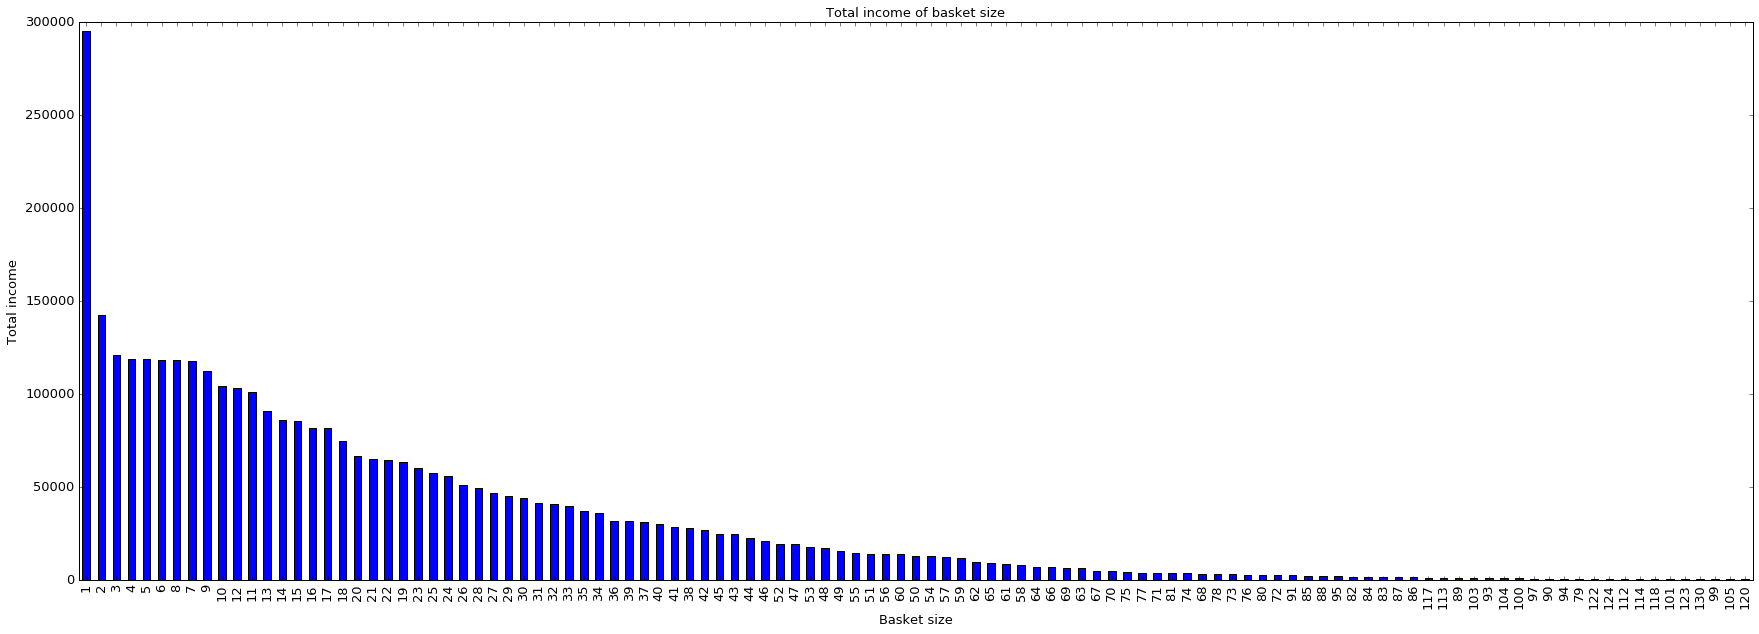

In [3]:
#b
products_total = sales[['Basket', 'Date', 'Time', 'Total']]
#group by basket, date and time and count the items in each basket, sum the total money in each basket
total_group = products_total.groupby(['Basket', 'Date', 'Time']).agg({'Basket':'count', 'Total':'sum'})
total_group.rename(columns={'Basket':'BasketSize', 'Total':'BasketTotal'}, inplace=True)
#group by basket size and sum the money for each basket size
basket_size_total = total_group.groupby(['BasketSize']).agg({'BasketTotal':'sum'})
basket_size_total = basket_size_total.sort_values(by='BasketTotal', ascending=0)
#get 10 top basket size that bring most money
print(basket_size_total.head(10))
#load bar chart of basket sizes and money they bring
basket_size_total_bar_plot = basket_size_total.sort(columns='BasketTotal',ascending=False).plot(kind='bar', legend=None, figsize = (30,10), title="Total income of basket size")
basket_size_total_bar_plot.set_xlabel("Basket size")
basket_size_total_bar_plot.set_ylabel("Total income")
for item in ([basket_size_total_bar_plot.title, basket_size_total_bar_plot.xaxis.label, basket_size_total_bar_plot.yaxis.label] + basket_size_total_bar_plot.get_xticklabels() + basket_size_total_bar_plot.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

2/ Study the relation between number of items in the basket and dollar value of the basket. Considering different "popularity" of different basket sizes from question 1, how much money does store get from each size of the basket? What kind of customers are more important - light (small baskets) of heavy (large baskets)?

The incomes from basket sizes are varied which the highest is from one-item basket which income is about $295,439. The second is two-item basket which income is about 142514. The baskets which contain over 100 items bring significantly less income than the others. In general, the less items basket bring more income than the baskets which contain more items. Assum that light customers are customers who buy less then 10 items per basket then they are considered more important than heavy customers as they bring more income than heavy customers.

C:\Users\Tu Tran\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


           BasketAverage
DayOfWeek               
Saturday     3922.250000
Sunday       3824.666667
Thursday     3656.000000
Wednesday    3640.666667
Monday       3607.666667
Tuesday      3593.666667
Friday       3543.750000


C:\Users\Tu Tran\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


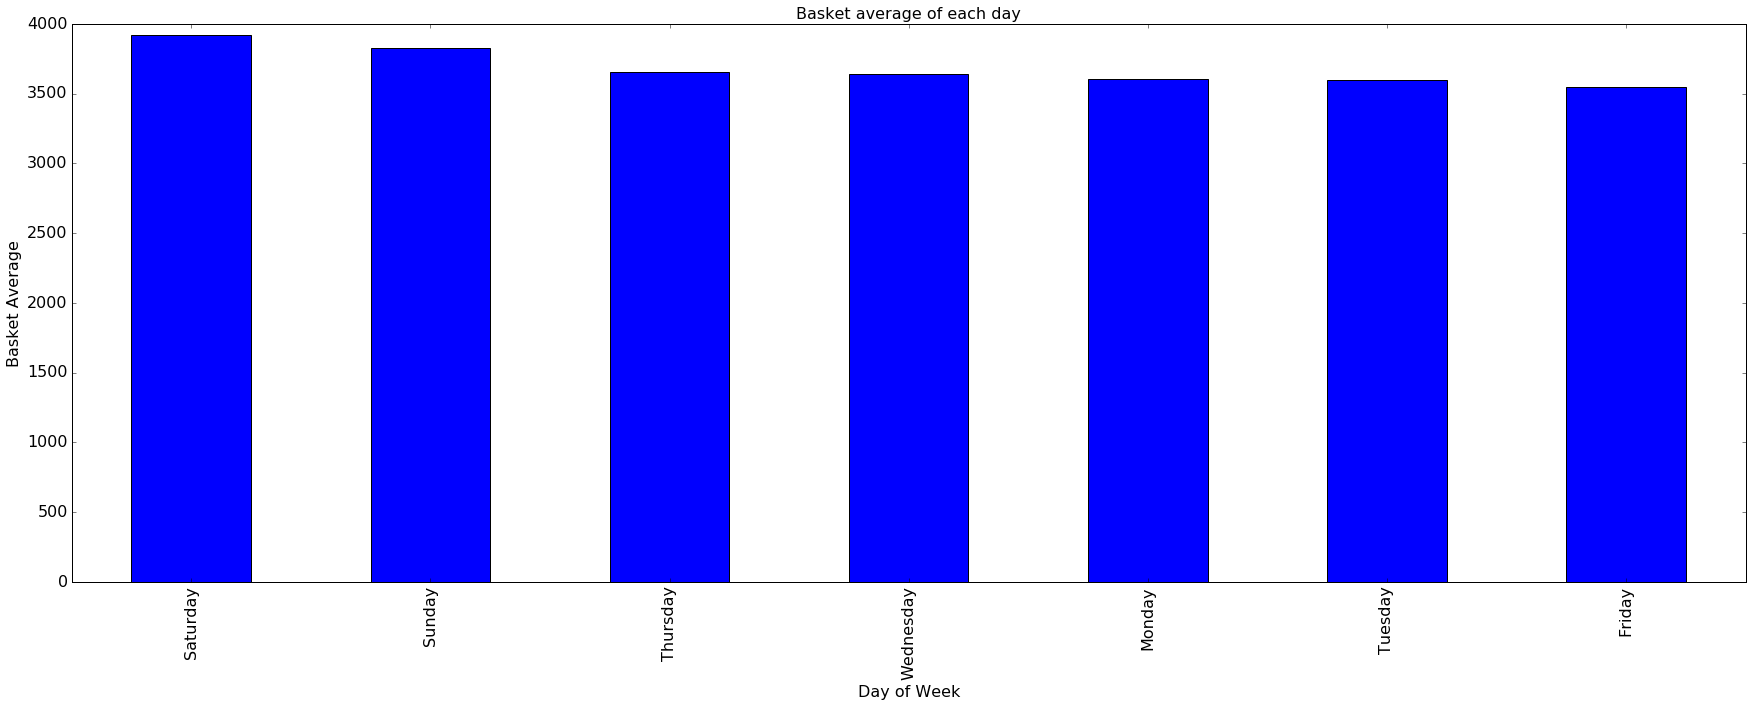

           IncomeAverage
DayOfWeek               
Saturday   185040.397500
Sunday     178546.993333
Monday     151212.983333
Thursday   148477.490000
Friday     142433.042500
Wednesday  140871.776667
Tuesday    136297.610000


C:\Users\Tu Tran\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


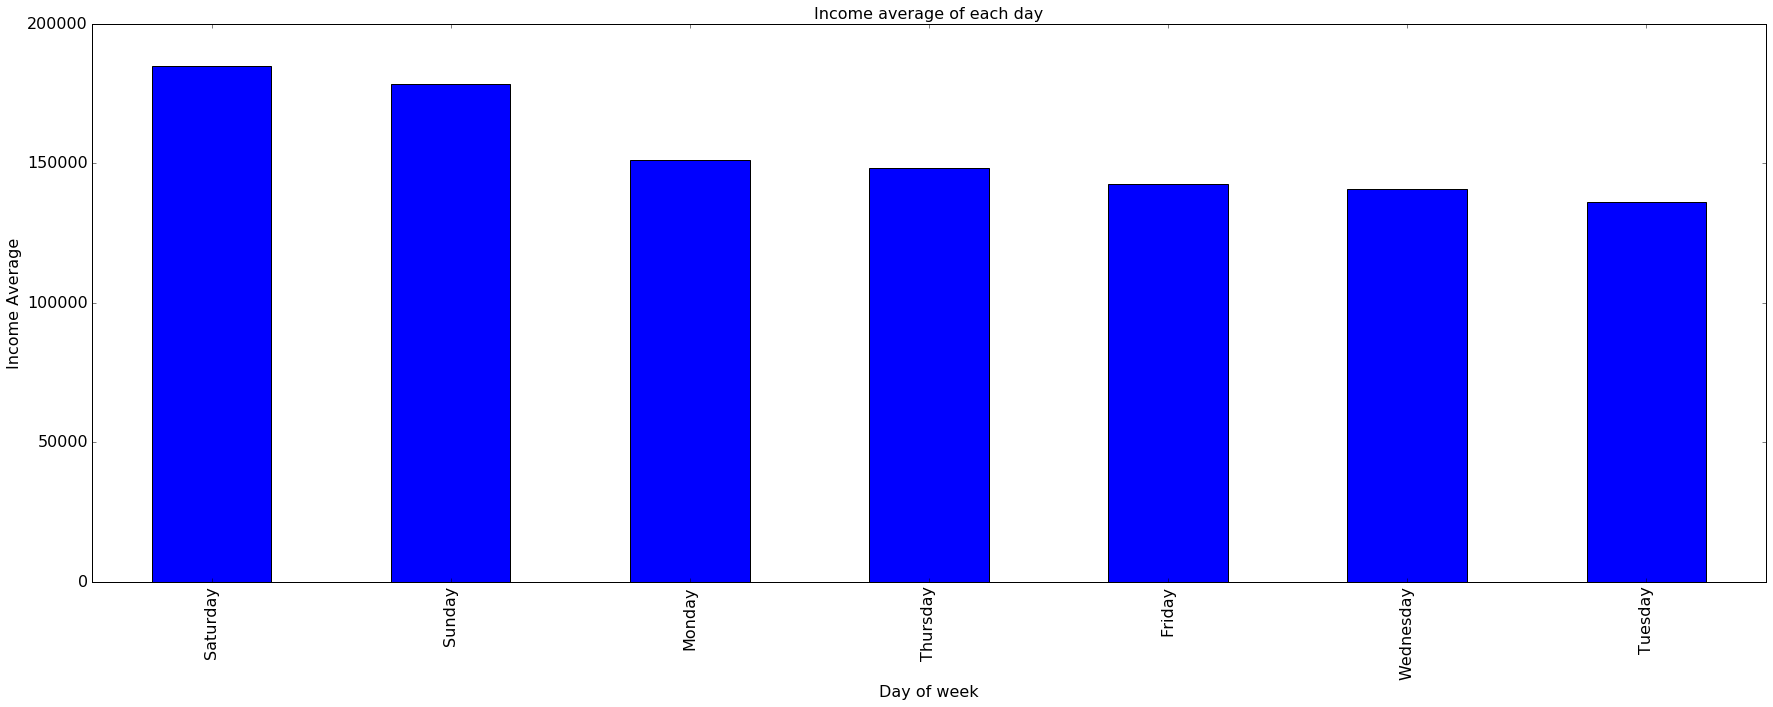

In [4]:
#c
products_basket_date = sales[['Basket', 'Date', 'Time']]
products_basket_date["Count"] = ""
#group by basket, date and time, count() is a way to convert the DataFrameGroupBy object to data frame (need to improve)
basket_date_group = products_basket_date.groupby(['Basket', 'Date', 'Time'], as_index=False).count()
#group by date and count the basket in each day
basket_count_date_group = basket_date_group.groupby(['Date'], as_index=False).agg({'Basket':'count'})
#add the day of week column
basket_count_date_group['Date'] = pd.to_datetime(basket_count_date_group['Date'], format='%m/%d/%y')
basket_count_date_group['DayOfWeek'] = basket_count_date_group['Date'].dt.weekday_name
#group by day of week and get average of number of basket of each day of week
basket_count_day_group = basket_count_date_group.groupby(['DayOfWeek']).agg({'Basket':'mean'})
basket_count_day_group.rename(columns={'Basket':'BasketAverage'}, inplace=True)
basket_count_day_group = basket_count_day_group.sort_values(by='BasketAverage', ascending=0)
#print day of week and average of baskets on each day of week
print(basket_count_day_group)
#load bar chart of day of week and average of baskets on each day of week
basket_count_day_bar_plot = basket_count_day_group.sort(columns='BasketAverage',ascending=False).plot(kind='bar', legend=None, figsize = (30,10), title="Basket average of each day")
basket_count_day_bar_plot.set_xlabel("Day of Week")
basket_count_day_bar_plot.set_ylabel("Basket Average")
for item in ([basket_count_day_bar_plot.title, basket_count_day_bar_plot.xaxis.label, basket_count_day_bar_plot.yaxis.label] + basket_count_day_bar_plot.get_xticklabels() + basket_count_day_bar_plot.get_yticklabels()):
    item.set_fontsize(16)
plt.show()


total_date = sales[['Total', 'Date']]
#group by date and get sum on each date
total_date_group = total_date.groupby(['Date'], as_index=False).agg({'Total':'sum'})
total_date_group['Date'] = pd.to_datetime(total_date_group['Date'], format='%m/%d/%y')
total_date_group['DayOfWeek'] = total_date_group['Date'].dt.weekday_name
#group by day of week and get average money of each day of week
total_mean_day_group = total_date_group.groupby(['DayOfWeek']).agg({'Total':'mean'})
total_mean_day_group.rename(columns={'Total':'IncomeAverage'}, inplace=True)
total_mean_day_group = total_mean_day_group.sort_values(by='IncomeAverage', ascending=0)
#print day of week and average money on each day of week
print(total_mean_day_group)
#load bar chart of day of week and income average on each day of week
total_mean_day_bar_plot = total_mean_day_group.sort(columns='IncomeAverage',ascending=False).plot(kind='bar', legend=None, figsize = (30,10), title="Income average of each day")
total_mean_day_bar_plot.set_xlabel("Day of week")
total_mean_day_bar_plot.set_ylabel("Income Average")
for item in ([total_mean_day_bar_plot.title, total_mean_day_bar_plot.xaxis.label, total_mean_day_bar_plot.yaxis.label] + total_mean_day_bar_plot.get_xticklabels() + total_mean_day_bar_plot.get_yticklabels()):
    item.set_fontsize(16)
plt.show()

3/ What day of the week is the busiest for the supermarket in terms of a number of shopping trips (one basket = one shopping trip)? What day is the most profitable?

The bar chart and the table can show clearly that by calculating bakset average, Saturday is the busiest day which basket average is about 3922.
Assume that the more income the day get, the more profitable it is, then Saturday is the most profitable day which income average is about $185040.